In [2]:
import requests
import json
import pandas as pd
import geopandas as gpd

In [3]:
res = requests.get("https://opensky-network.org/api/states/all")

In [4]:
states_json = res.json()
states_json["states"]
df = pd.DataFrame(states_json["states"])

In [5]:
df_flights = df[[2,5,6]].rename(columns={2:"Country",5:"Lon",6:"Lat"})

<AxesSubplot:xlabel='Lon', ylabel='Lat'>

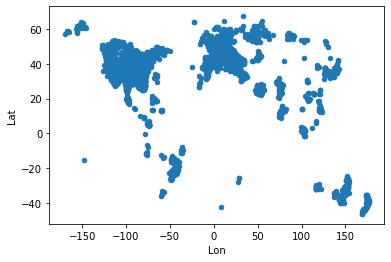

In [6]:
df_flights.plot.scatter(x="Lon",y="Lat")

['naturalearth_cities', 'naturalearth_lowres', 'nybb']


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."
22,57713,North America,Greenland,GRL,2173.0,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
27,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."
33,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429..."
34,4930258,North America,Costa Rica,CRI,79260.0,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
35,6025951,North America,Nicaragua,NIC,33550.0,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."


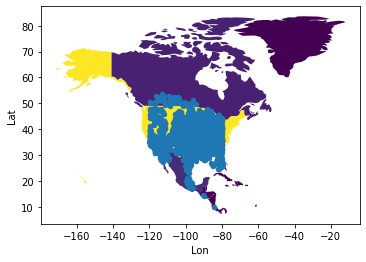

In [29]:
path_to_data = gpd.datasets.get_path("naturalearth_lowres")
print(gpd.datasets.available)
gdf = gpd.read_file(path_to_data).query('continent=="North America"')
ax = gdf.plot("gdp_md_est")
df_flights.query('Lon<-80 & Lon> -120').plot.scatter(x="Lon",y="Lat",ax=ax)
display(gdf)

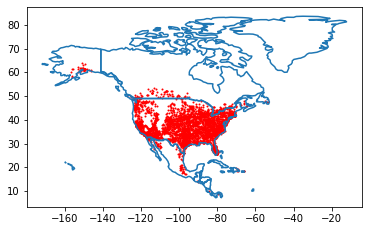

In [28]:
#I threw this in here at the end
df_flights_gpd = gpd.points_from_xy(df_flights.Lon,df_flights.Lat)
df_flights_gpd.crs = gdf.crs
df_flights2=gpd.GeoDataFrame(df_flights,geometry=df_flights_gpd)
ax = gdf.boundary.plot()
ax = df_flights2.sjoin(gdf,predicate="within").plot(ax=ax,color="r",markersize=1)
